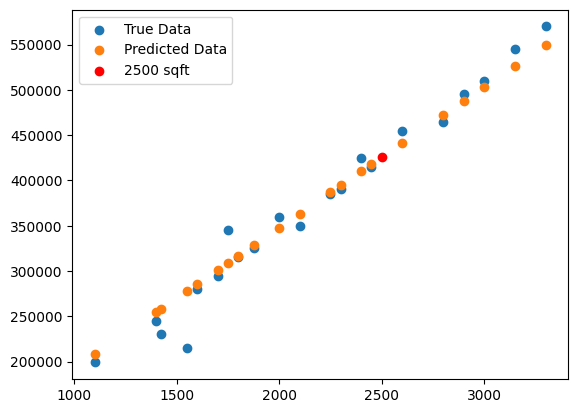

prediction for 2500 sqft. house: [425628.54]


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import csv


class LinearRegression:
    """
    treat biases and weights separately lol
    ensures 2d matrix form for x and y
    """
    def __init__(self):
        self.w = None
        self.b = None

    def mse_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def predict(self, x):
        if len(x.shape) == 1:
            x = np.expand_dims(x, axis=-1)
        return x @ self.w + self.b

    def fit(self, x, y_true, iters=1000, lr=0.01):
        if len(x.shape) == 1:
            x = np.expand_dims(x, axis=-1)
        if len(y_true.shape) == 1:
            y_true = np.expand_dims(y_true, axis=-1)
        n = x.shape[0]
        p = x.shape[1]
        self.w = np.random.randn(p, 1)
        self.b = np.random.randn(1, 1)
        for i in range(iters):
            y_pred = self.predict(x)
            dL_dw = 2 * x.T @ (y_pred - y_true) / n
            dL_db = 2 * np.sum(y_pred - y_true) / n
            self.b -= lr * dL_db
            self.w -= lr * dL_dw


reg = LinearRegression()
footage = []
price = []
with open("/content/housing_prices - housing_prices.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    for line in csv_reader:
        try:
            footage.append(int(line[0]))
            price.append(int(line[1]))
        except:
            pass

footage = np.array(footage, dtype=np.float64)
price = np.array(price, dtype=np.float64)

footage_scaler = (np.max(footage) - np.min(footage))
price_scaler = (np.max(price) - np.min(price))

footage = footage / footage_scaler
price = price / price_scaler

reg.fit(footage, price)

predict_2500 = np.round(reg.predict(np.array([2500/footage_scaler]))[0] * price_scaler, 2)

preds = reg.predict(footage)
plt.scatter(footage*footage_scaler, price*price_scaler, label="True Data")
plt.scatter(footage*footage_scaler, preds*price_scaler, label="Predicted Data")
plt.scatter(2500, predict_2500, label="2500 sqft", color="red")
plt.legend()
plt.show()

print(f"prediction for 2500 sqft. house: {predict_2500}")